# The Apprentice's Enthusiastic Guide to pandas
##     *or how to look at the world through* 
##     *the gentle eyes of one*

![title](img/panda_eyes.JPG)

# The word Apprentice might describe the world of a 
# being who embarks on the wonderful
# journey of learning. 
# Shall we?

# Who is Ingrid and why does she love Pandas?

![title](img/ingrid_panda.JPG)

## P.S.: Ingrid is a developer at RadarServices and plays the flute on the meadows of the University of Arts in Graz. 
    

# The Pandas soon realized there's no way 
# they are going to survive

# They needed a fresh view over the world 
# and its intrinsic mechanisms

# pandas



##     a high performative library in the midst of the forest 
    
##     a powerful toolkit for data structures 
   
##     and data analysis

 

# Pandas bite, you know? 
![title](img/pandas_bite.JPG)

# Let's import this long-dreamed library

In [1]:
import pandas as pd               # imports long-dreamed library

In [2]:
# shows pictures with colors
%matplotlib inline

# we don't want warnings in the presentation
import warnings
warnings.filterwarnings('ignore')

# we need this later
import io
from contextlib import redirect_stdout, contextmanager

# Data Sets A.K.A. all the little mysteries and quests 
# they would like to solve. From Kaggle.com:

# - Extinct and endangered languages in the world 
(it's the languages they had to master for world domination)

# - Biodiversity in the US national parks
(it's time to get to know our enemies, who are we going to share our prey with?)


# Pandas DataFrame - holds the precious data

Think of an **Excel spreadsheet**, or forget about the **Excel spreadsheet**,
# think of a rice paddy! 
# 田田田田

![title](img/abstract_rice_paddy.jpg)

# A **row** is an instance, a finding or an observation.
# **Columns** are the various attributes of the observation.

For example pandas have a name, a literal Chinese name translation, their order and favorite food.

- Giant Panda, Big Bear Cat, Carnivora, Bamboo
- Red panda, Red Bear Cat, Carnivora, Bamboo

# Pandas allows us to read data from many formats like:

- Excel spreadsheets
- or CSV (comma separated values)
- or SQL databases or many more

In [3]:
# Enough talking, let's decide for a path in life,
# let's make something meaningful out of it!

idiomas = pd.read_csv('extinct_languages.csv')

species = pd.read_csv('species.csv')

In [4]:
languages = pd.read_csv('extinct_languages.csv')


# Removing columns and from their genes their procrastinative behavioural patterns!

In [5]:
# by name, axis=1 (we're removing a column), inplace=True => foreveeer
languages.drop('ID', axis=1, inplace=True)

In [6]:
languages.head(1)

,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.249,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."


# Enough joking around, off with their heads!

In [7]:
# dropping by column number
idiomas = languages.drop(languages.columns[[1, 2, 4, 5, 7, 8, 10, 13]], axis=1)

In [8]:
idiomas.tail(2)

,Name in English,Countries,Degree of endangerment,Number of speakers,Latitude,Longitude
2720,Zangskari,"India, Pakistan",Definitely endangered,NaN,34.0833,76.8500
2721,Zidgali,Oman,Critically endangered,NaN,23.4027,58.0957


# Renaming the columns

In [9]:
idiomas.rename(columns = {'Name in English': 'Name', 
                          'Degree of endangerment': 'Endangerment', 
                          'Number of speakers': 'Speakers'}, 
               inplace=True)

In [10]:
idiomas.head(2)

,Name,Countries,Endangerment,Speakers,Latitude,Longitude
0,South Italian,Italy,Vulnerable,7500000.0,40.9798,15.2490
1,Sicilian,Italy,Vulnerable,5000000.0,37.4399,14.5019


# Data Types

- `float`, `int`, `bool`, 
- `datetime64[ns]` and `datetime64[ns, tz]`, `timedelta[ns]`, 
- `category` and `object`.

**Attention, Attention:** `object`: various data types like float(42.1 or NaN) and string ("Snape").

* Pandas uses the `object` `dtype` for storing strings!


In [11]:
idiomas.dtypes

Name             object
Countries        object
Endangerment     object
Speakers        float64
Latitude        float64
Longitude       float64
dtype: object

# What are categories?


   Categoricals are a pandas data type, which correspond to categorical variables in statistics: a variable, 
    which can take on only a limited, and usually fixed, number of possible values (categories, levels in R).



Yes, but 

## What are categories after all?

Houses (categories) in Harry Potter:

- Gryffindor 
- Slytherin
- Hufflepuff
- Ravenclaw

In the `idiomas` dataset the degree of endangerment would make a good
category.

# Switching to categorical data 

In [12]:
endangerments = idiomas['Endangerment'].astype('category')
idiomas['Endangerment_category'] = endangerments

In [13]:
idiomas.Endangerment_category.dtype    # oh noooo, ordered=False !!!

CategoricalDtype(categories=['Critically endangered', 'Definitely endangered', 'Extinct',
                  'Severely endangered', 'Vulnerable'],
                 ordered=False)

In [14]:
# let's clean up the unordered category
del idiomas['Endangerment_category']

In [15]:
# We use memory_usage='deep' for a deep inspection
# of all object dtypes

idiomas.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 6 columns):
Name            2722 non-null object
Countries       2721 non-null object
Endangerment    2722 non-null object
Speakers        2539 non-null float64
Latitude        2719 non-null float64
Longitude       2719 non-null float64
dtypes: float64(3), object(3)
memory usage: 626.6 KB


# Switching to categorical data with CategoricalDTypes

In [16]:
%timeit idiomas.Endangerment == 'Definitely endangered'

253 µs ± 2.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
from pandas.api.types import CategoricalDtype
categories = ['Vulnerable', 'Definitely endangered', 
              'Severely endangered', 'Critically endangered', 'Extinct']

# However, in Hogwarts - we could not order the houses.
degree_of_endangerment = CategoricalDtype(categories=categories, ordered=True)

dangers = idiomas['Endangerment'].astype(degree_of_endangerment)
idiomas['Endangerment'] = dangers

In [18]:
%%timeit 
idiomas.Endangerment == 'Definitely endangered'

106 µs ± 399 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# The `dtype` of Endangerment is now `category`

# But what type does pandas use for categories?

In [19]:
# If we ask ourselves how the category works -> it is stored as a list / array and pandas save the index.

dict(enumerate(idiomas['Endangerment'].cat.categories))


{0: 'Vulnerable',
 1: 'Definitely endangered',
 2: 'Severely endangered',
 3: 'Critically endangered',
 4: 'Extinct'}

# We save a `0` instead of 'Vulnerable' or a `4` instead of 'Extinct'
So instead of cluttering our minds with many many strings, 
we only have to remember a few numbers! 

Our memory will say thanks!

# Let's check the `DataFrame.info()` again!

Is the category type in there? Without a `category` we needed **626.6 KB** of memory.

In [20]:
idiomas.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 6 columns):
Name            2722 non-null object
Countries       2721 non-null object
Endangerment    2722 non-null category
Speakers        2539 non-null float64
Latitude        2719 non-null float64
Longitude       2719 non-null float64
dtypes: category(1), float64(3), object(2)
memory usage: 433.7 KB


# Laborious efforts of dealing with missing data

Because data is often missing, malformed or empty.

The method `DataFrame.isnull` can help us to
find those entries.

# There are languages which hide their Number of Speakers!

In [21]:
idiomas.isnull().sum()

Name              0
Countries         1
Endangerment      0
Speakers        183
Latitude          3
Longitude         3
dtype: int64

In [22]:
# we can be sneaky and fill the speakers information with .fillna

idiomas.Speakers = idiomas.Speakers.fillna(0).astype('int')
idiomas.isnull().sum()

Name            0
Countries       1
Endangerment    0
Speakers        0
Latitude        3
Longitude       3
dtype: int64

# Species dataset: We found a lot of nulls in the column `Unnamed: 13`


In [23]:
species.shape

(119248, 14)

In [24]:
species.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

# There are some rows where `Unnamed: 13` is not null

In [25]:
# on 5 rows the columns shifted to the right.
species[species['Unnamed: 13'].notnull()][:2]

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
6441,BISC-1026,Biscayne National Park,Mammal,Sirenia,Trichechidae,Trichechus manatus,Manatee,Manati,Approved,Present,Unknown,Unknown,NaN,Endangered
31786,EVER-1414,Everglades National Park,Reptile,Crocodilia,Crocodylidae,Crocodylus acutus,American Crocodile,Cocodrilo De Tumbes,Approved,Present,Native,Uncommon,Resident,Threatened


In [26]:
# it is only shifted on certain rows & certain columns!

shifted_rows = species['Unnamed: 13'].notnull()
shifted_columns = ['Record Status', 'Occurrence', 'Nativeness',
                   'Abundance', 'Seasonality', 'Conservation Status',
                   'Unnamed: 13']

indexes = species[shifted_rows].index

species.loc[indexes, shifted_columns] = species[shifted_rows][shifted_columns].shift(-1, axis=1)


In [27]:
species.loc[indexes].head(3)

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
6441,BISC-1026,Biscayne National Park,Mammal,Sirenia,Trichechidae,Trichechus manatus,Manatee,Approved,Present,Unknown,Unknown,NaN,Endangered,NaN
31786,EVER-1414,Everglades National Park,Reptile,Crocodilia,Crocodylidae,Crocodylus acutus,American Crocodile,Approved,Present,Native,Uncommon,Resident,Threatened,NaN
31826,EVER-1454,Everglades National Park,Reptile,Testudines,Cheloniidae,Caretta caretta,Loggerhead,Approved,Present,Native,Rare,Breeder,Threatened,NaN


In [28]:
especies = species.drop(species.columns[[0, 3, 4, 7, 9, 11,13]], axis=1)

In [29]:
especies.rename(columns = {'Park Name': 'Park_Name', 
                           'Category': 'Class', 
                           'Scientific Name': 'Scientific_Name', 
                           'Common Names': 'Common_Names', 
                           'Conservation Status': 'Conservation'},
               inplace=True)

In [30]:
especies.loc[158:161]

,Park_Name,Class,Scientific_Name,Common_Names,Occurrence,Abundance,Conservation
158,Acadia National Park,Bird,Calidris minutilla,Least Sandpiper,Present,Common,NaN
159,Acadia National Park,Bird,Calidris pusilla,Semipalmated Sandpiper,Present,Abundant,NaN
160,Acadia National Park,Bird,Catoptrophorus semipalmatus,"Eastern Willet, Willet",Not Confirmed,NaN,NaN
161,Acadia National Park,Bird,Gallinago gallinago,"Common Snipe, Wilson's Common Snipe, Wilson's ...",Present,Rare,NaN


# Which countries have the most endangered languages?

`Series.value_counts` counts how often it spots a value.

In [31]:
idiomas.Countries.value_counts()[:10]

United States of America    216
Brazil                      186
India                       163
Indonesia                   149
Mexico                      143
China                       122
Russian Federation          119
Australia                   108
Papua New Guinea             98
Canada                       82
Name: Countries, dtype: int64

# Another option to group is to `groupby`.

# How many people are, in total, in each group?

In [32]:
endangerment_groups = idiomas.groupby('Endangerment')
endangerment_groups.Speakers.sum()

Endangerment
Vulnerable               90995144
Definitely endangered    39503297
Severely endangered       5226486
Critically endangered      501388
Extinct                     13642
Name: Speakers, dtype: int64

# Can you show me this as a picture, Mr. Pandas?

![title](img/quinlingpandabearrbrown.jpg)

# Ay, Ay, with a plot pie!

In [33]:
# we first remove the languages which are 'extinct' 
# because there are no speakers there unfortunately
not_extinct = idiomas.Endangerment != 'Extinct'
endangerment_groups = idiomas[not_extinct].groupby('Endangerment')

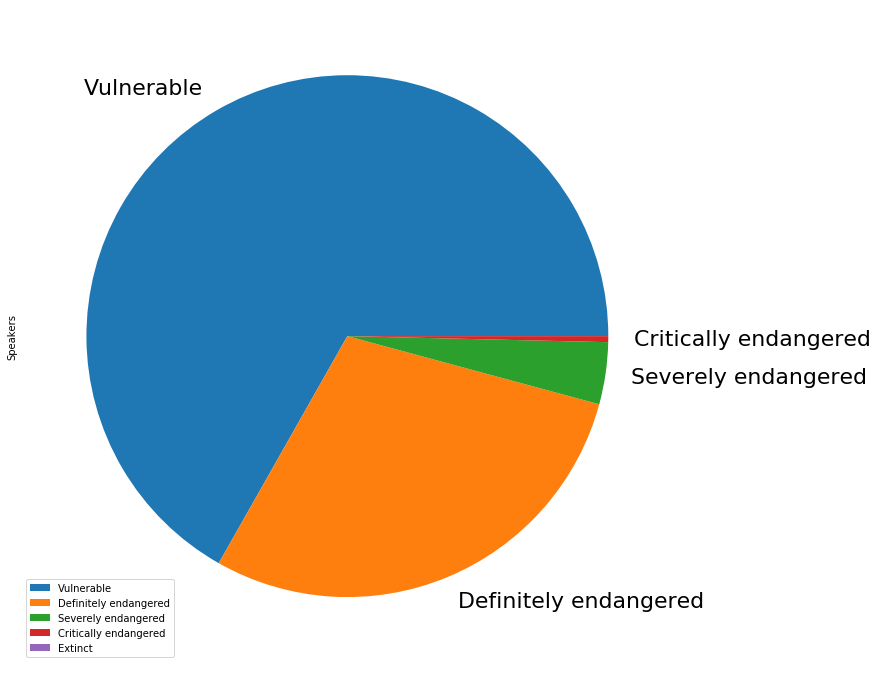

In [34]:
endangerment_groups.Speakers.sum().plot.pie(figsize=(16, 12), fontsize=22, 
                                            legend=True);

# Filtering the nonsensical superstitions

# Quest: filter! find me specific rows which fulfill 
# certain requirements!

**Filters** are just lists containing `True` or `False`

with the same length as the **number of rows** in the dataframe.

# When you apply a filter directly to the dataset...

# you can go fully berserk!

In [35]:
idiomas.loc[(idiomas.Speakers > 1000) &
        (idiomas.Countries == 'Peru') & 
        (idiomas.Endangerment >= 'Severely endangered'), :'Speakers'].sample(4)

,Name,Countries,Endangerment,Speakers
753,Nomatsiguenga,Peru,Severely endangered,4500
668,Quechua of San Martín,Peru,Severely endangered,6000
1034,Quechua of Yauyos,Peru,Critically endangered,1700
600,Yanesha,Peru,Severely endangered,8000


# Let's find languages which are **only** in Romania!

In [36]:
idiomas[idiomas.Countries.isin(['Romania'])]

,Name,Countries,Endangerment,Speakers,Latitude,Longitude
244,Transylvanian Saxon,Romania,Severely endangered,50000,46.2140,24.2413
353,Csángó Hungarian,Romania,Severely endangered,25000,46.7925,27.1911
2643,Nogay (Dobruja),Romania,Severely endangered,0,44.6491,27.8173


# Creating a filter with a dictionary or a function

In [37]:
def contains_moose(animal):
    """
    I check if an animal is a mooooose...
    Yes, we can build amazing filtering functions! 
    Hoooooray!
    """
    animal = str(animal)
    if 'moose' in animal.lower():
        return True
    else:
        return False

# Where's Mr. `moose` at?


In [38]:
mooooooses = especies['Common_Names'].map(contains_moose)

# Oops, my moose! 

**American Cranberrybush, Mooseberry** or **Yellow Moosedung Moss**?

In [39]:
especies[mooooooses]['Common_Names'].value_counts()

Moose                                      14
Eurasian Elk, Moose                         4
Eastern Leatherwood, Moosewood              3
Moosebrush                                  1
Moose Maple, Mountain Maple                 1
Caribou, Cervids, Deer, Moose, Wapiti       1
Yellowstone Moose                           1
American Cranberrybush, Mooseberry          1
Striped Maple, Striped Maple, Moosewood     1
Striped Maple, Moosewood                    1
Yellow Moosedung Moss                       1
Name: Common_Names, dtype: int64

![title](img/yellow_moose.jpg)

# Precision it's what we need when we're talking about `Moose`

In [40]:
is_mammal = especies.Class == 'Mammal'
especies[mooooooses & is_mammal]['Common_Names'].value_counts()

Moose                                    14
Eurasian Elk, Moose                       4
Caribou, Cervids, Deer, Moose, Wapiti     1
Yellowstone Moose                         1
Name: Common_Names, dtype: int64

![title](img/alaskan_moose_pair.jpg)

# Bar Chart horizontal: The number of species per class

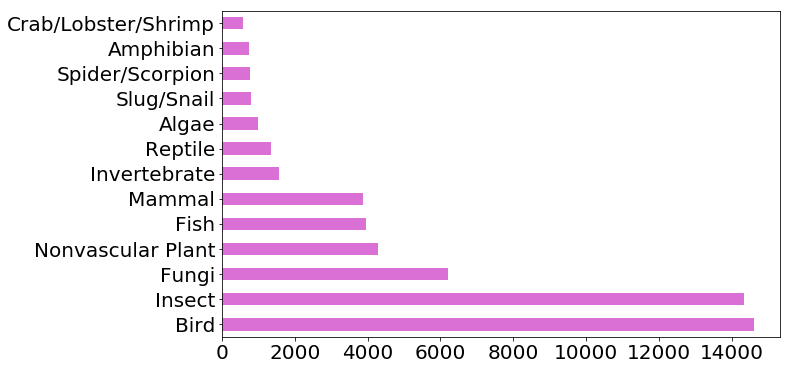

In [41]:
filter_vasculars = especies.Class != 'Vascular Plant'
no_vascular_plants = especies[filter_vasculars].Class.value_counts()
no_vascular_plants.plot.barh(figsize=(10, 6), fontsize=20, color='orchid'); 
# barh barh!

# We enter a new Land:

# The Mystifying Land of Accessors!

# But what are accessors?

# Properties that serve as an interface to additional methods.

In [42]:
pd.Series._accessors

{'cat', 'dt', 'sparse', 'str'}

In [43]:
# Accessors provide a huge number of useful methods  
# depending on the type a column has, for example:

str([name for name in dir(especies.Class.str) if not name.startswith('_')])

"['capitalize', 'cat', 'center', 'contains', 'count', 'decode', 'encode', 'endswith', 'extract', 'extractall', 'find', 'findall', 'get', 'get_dummies', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'islower', 'isnumeric', 'isspace', 'istitle', 'isupper', 'join', 'len', 'ljust', 'lower', 'lstrip', 'match', 'normalize', 'pad', 'partition', 'repeat', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'slice', 'slice_replace', 'split', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'wrap', 'zfill']"

 # Let's try it out!

In [44]:
# Let's remove this unnecessary information from each National Park name

especies['Park_Name'][0]

'Acadia National Park'

In [45]:
# The .str accessor method contains a huge amount of useful string manipulation functions!

especies['Park_Name'] = especies['Park_Name'].str.replace('National Park', '')
especies['Park_Name'] = especies['Park_Name'].str.strip()
especies['Park_Name'][0]

'Acadia'

In [46]:
# Which languages are flying away from Slovakia? 
# We can try str.contains for that!

idiomas.Countries = idiomas.Countries.astype('str')
idiomas[idiomas.Countries.str.contains("Slovakia")].sample(4)

,Name,Countries,Endangerment,Speakers,Latitude,Longitude
2716,Yiddish (Europe),"Germany, Austria, Belarus, Belgium, Denmark, E...",Definitely endangered,0,53.3571,25.2465
316,Burgenland Croatian,"Austria, Hungary, Slovakia",Definitely endangered,30000,47.8435,16.5179
5,Romani,"Albania, Germany, Austria, Belarus, Bosnia and...",Definitely endangered,3500000,46.3165,22.3681
31,Rusyn,"Hungary, Poland, Romania, Slovakia, Ukraine",Vulnerable,1000000,48.4437,22.9394


In [47]:
# Oh, but sorry, I need a different type of accessor!
# well, no prob lad - you can define your own proper accessor!

@pd.api.extensions.register_series_accessor("panda_likes_bamboo")
class PandasRevolutionBambooAccessor:
    def __init__(self, series):
        self._validate(series)
        self._series = series
    
    @staticmethod
    def _validate(series):
        # I am compulsory - do not ignore me :) !!!!!!!
        pass

    @property
    def is_bamboo(self):
        return self._series.str.lower().str.contains('bamboo')

In [48]:
# What a treat! So much bamboo!

contains_bamboo = especies.Common_Names.panda_likes_bamboo.is_bamboo
especies.loc[contains_bamboo, 'Park_Name':'Common_Names'].sample(4)

,Park_Name,Class,Scientific_Name,Common_Names
84371,Olympic,Vascular Plant,Polygonum cuspidatum,"Fleeceflower, Japanese Knotweed, Mexican Bamboo"
48010,Great Smoky Mountains,Vascular Plant,Nandina domestica,"Heavenly Bamboo, Nandina"
58731,Hawaii Volcanoes,Vascular Plant,Arundina graminifolia,Bamboo Orchid
29007,Death Valley,Vascular Plant,Pseudosasa japonica,Arrow Bamboo


![title](img/Giant_Pandas_having_a_snack.jpg)

In [49]:
# But until now we only spoke about the series accessors! 
# We want diversity!
# no problem, plenty of them to choose from! Register on!

pd.api.extensions.register_dataframe_accessor # dataframe
pd.api.extensions.register_index_accessor     # index
pd.api.extensions.register_series_accessor    # series


<function pandas.core.accessor.register_series_accessor(name)>

In [50]:
# because PANDAS NEVER REPEAT THEMSELVES 

@pd.api.extensions.register_dataframe_accessor("panda_revolution")
class PandasDonTRepeatThemselves(object):
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj = pandas_obj

    @staticmethod
    def _validate(obj):
        # You MUST IMPLEMENT ME!
        if 'Latitude' not in obj.columns or 'Longitude' not in obj.columns:
            raise AttributeError("Must have 'Latitude' and 'Longitude'.")

    def world_map(self):
        self._obj.plot.scatter('Longitude', 'Latitude', figsize=(28, 18), 
                               title='The Blue Planet', label='Language')
    

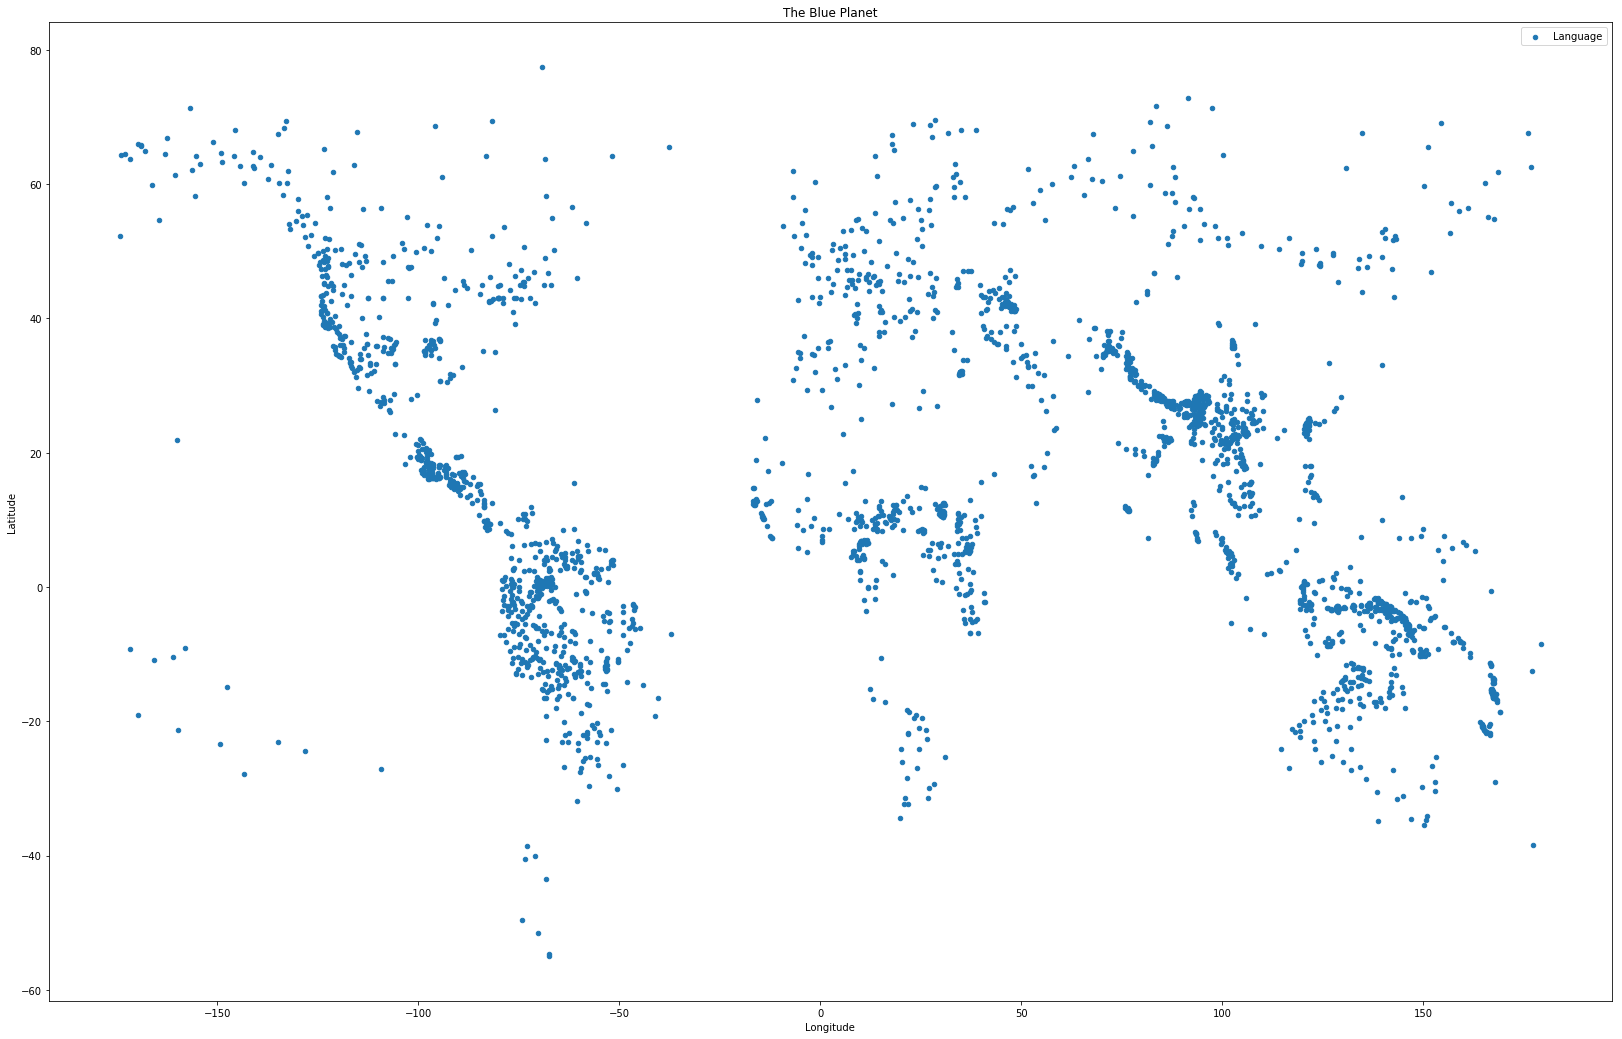

In [51]:
# They made it! World domination is what they reached! 
idiomas.panda_revolution.world_map()

# The Pandas thank you for your attention :)
# You can find the talk later at: https://github.com/twigleingrid/pyconslovakia2019